### QuickSort Algorithm


In [1]:
def quicksort(arr):
    if len(arr)<=1:
        return arr
    else:
        pivot = arr.pop()
        left_arr =[]
        right_arr =[]
        for val in arr:
            if val<pivot:
                left_arr.append(val)
            else: 
                right_arr.append(val)
        return quicksort(left_arr)+[pivot]+quicksort(right_arr)
            

In [2]:
quicksort([0,9,3,8,2,7,8])

[0, 2, 3, 7, 8, 8, 9]

### MergeSort Algorithm

In [7]:
def merge(sorted_left,sorted_right):
    sorted_list = []
    i=0;j=0
    while (i<len(sorted_left) and j<len(sorted_right)):
        if(sorted_left[i]<sorted_right[j]):
            sorted_list.append(sorted_left[i])
            i=i+1
        else:
            sorted_list.append(sorted_right[j])
            j=j+1
    if(i<len(sorted_left)):
        sorted_list.extend(sorted_left[i:])
    if(j<len(sorted_right)):
        sorted_list.extend(sorted_right[j:]) 
    return sorted_list
    
def mergeSort(arr):
    if len(arr)<=1:
        return arr
    mid = len(arr)//2
    left_arr = mergeSort(arr[:mid])
    right_arr = mergeSort(arr[mid:])
    result = merge(left_arr,right_arr)
    return result

In [8]:
mergeSort([89,70,32,90,69,10])

[10, 32, 69, 70, 89, 90]

### Question: [(0,"x"), (1, 12), (0, 34), (1,90), (1,89), (0,"s"),  (1, "7")]
#### Move all zeros to the begining and all 1s to end without using another list in order of n
#### Input: [(0,"x"), (1, 12), (0, 34), (1,90), (1,89), (0,"s"),  (1, "7")]
#### Expected Output: [(0,"x"), (0, 34), (0,"s"), (1,89), (1,90), (1, 12),  (1, "7")]

In [6]:
def arrange_zeros_and_ones(arr):
    left,right = 0, len(arr)-1
    while left<=right:
        if arr[left][0] == 0:
            left+=1
        elif arr[right][0] == 1 :
            right-=1
        else:
            arr[left],arr[right] = arr[right],arr[left]
    return arr

In [7]:
arrange_zeros_and_ones( [(0,"x"), (1, 12), (0, 34), (1,90), (1,89), (0,"s"), (1, "7")])

[(0, 'x'), (0, 's'), (0, 34), (1, 90), (1, 89), (1, 12), (1, '7')]

In [5]:
def rearrange_zeros_ones_and_others(arr):
    left,right = 0, len(arr)-1
    while left<=right:
        if arr[left][0] != 1:
            left += 1
        elif arr[right][0] != 0:
            right -= 1
        else:
            arr[left],arr[right] = arr[right],arr[left]
    return arr

In [6]:
rearrange_zeros_ones_and_others( [(0,"x"), (1, 12), (2,5),(0, 34), (1,90), (3,9),(1,89), (0,"s"), (1, "7")])

[(0, 'x'),
 (0, 's'),
 (2, 5),
 (0, 34),
 (1, 90),
 (3, 9),
 (1, 89),
 (1, 12),
 (1, '7')]

### Counting Sort:
### Q: Sort the numbers containing age of people. Billion numbers.

#### I maintain an array of 200 numbers. 0th index is for people with 0 yrs....
#### 200th elements contains count of people with 200 age.

In [21]:
def counting_sort(arr):
    max_age = max(arr)
    age_count_arr=[0]*(max_age+1)
    for i in range(len(arr)):
        age_count_arr[arr[i]] += 1
    return age_count_arr

In [22]:
counting_sort([1,2,2,3,4,5,6,1,2,5])

[0, 2, 3, 1, 1, 2, 1]

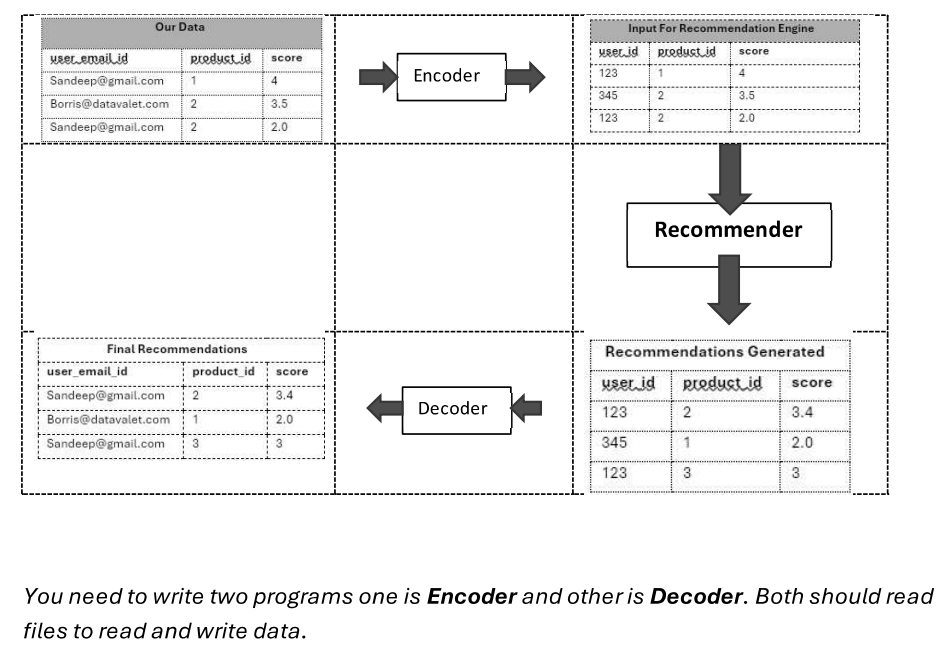

In [57]:
# dictionary approach
import json
def string_to_int_encoder (input_file,output_file):
    email_mapping ={}
    with open(input_file) as ifile, open(output_file,"w+") as ofile ,open("email_mapping.json","w+") as mfile:
        running_count =1
        for line in ifile:
            (email,prod_id,score) = line.split(",")
            if email not in email_mapping:
                email_mapping[email]= running_count
                running_count +=1
            ofile.write(",".join([str(email_mapping[email]),prod_id,score]))
        mfile.write(json.dumps(email_mapping))
        

In [58]:
string_to_int_encoder("user_data.txt", "user_data_encoded.txt")

In [101]:
def reverse_mapping(mapping):
    rev_map ={}
    for k,v in mapping.items():
        rev_map[v] =k
    return rev_map
# dictionary approach
import json
def int_to_email_decoder (encoded_file,output_file,mapping_file):
    with open(encoded_file) as efile, open(output_file, "w+") as ofile, open(mapping_file) as mfile:
        email_mapping = json.load(mfile)
        email_mapping = reverse_mapping(email_mapping)
        for line in efile:
            (email_id,prod_id,score) = line.split(",")
            user_email =""
            if int(email_id) in email_mapping:
                user_email = email_mapping[int(email_id)]
            ofile.write(",".join([user_email,prod_id,score]))


In [102]:
int_to_email_decoder("user_data_encoded.txt","user_data_decoded.txt","email_mapping.json")

In [141]:
#without dictionary approach
def sortfile(file):
    with open(file,"r") as ifile:
        lines = ifile.readlines()
    with open(file,"w") as ofile:
        ofile.writelines(sorted(lines))

def encoder_without_dict (input_file,output_file):
    sortfile(input_file)
    with open(input_file,"r") as ifile, open(output_file,"w+") as ofile,open("email_mapping.json","w+") as mfile:
        prev_email = None
        count =1
        for line in ifile:
            (email_id,prod_id,score) = line.split(",") 
            if email_id != prev_email:  
                ofile.write("," . join([str(count),prod_id,score]))
                mfile.write(":" . join([str(count),email_id]))
                mfile.write("\n")
                count +=1
                prev_email =email_id
            else:
                ofile.write("," . join([str(count-1),prod_id,score]))

In [142]:
encoder_without_dict("user_data.txt","user_data_encoded.txt")